In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
import tensorflow.keras as keras
import keras.layers as layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

2025-08-05 23:53:23.276465: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754438003.634309      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754438003.748546      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
paths = ['/kaggle/input/meteonet/NW_Ground_Stations/NW_Ground_Stations/NW_Ground_Stations_2016.csv',
         '/kaggle/input/meteonet/NW_Ground_Stations/NW_Ground_Stations/NW_Ground_Stations_2017.csv',
         '/kaggle/input/meteonet/NW_Ground_Stations/NW_Ground_Stations/NW_Ground_Stations_2018.csv']

In [3]:
num_cols = ['height_sta','dd', 'ff', 'precip','hu', 'td', 't', 'psl']
dtype = dict([(k,'float32') for k in num_cols])

In [4]:
def open_csv(path:str):
    df =  pd.read_csv(
      path,
      header = 0,
      dtype = dtype
  )
    return df

In [5]:
weather_data = pd.concat((open_csv(_) for _ in paths))

In [6]:
weather_data.head()

,number_sta,lat,lon,height_sta,date,dd,ff,precip,hu,td,t,psl
0,14066001,49.33,-0.43,2.0,20160101 00:00,210.0,4.4,0.0,91.0,278.450012,279.850006,NaN
1,14126001,49.15,0.04,125.0,20160101 00:00,NaN,NaN,0.0,99.0,278.350006,278.450012,NaN
2,14137001,49.18,-0.46,67.0,20160101 00:00,220.0,0.6,0.0,92.0,276.450012,277.649994,102360.0
3,14216001,48.93,-0.15,155.0,20160101 00:00,220.0,1.9,0.0,95.0,278.250000,278.950012,NaN
4,14296001,48.80,-1.03,339.0,20160101 00:00,NaN,NaN,0.0,NaN,NaN,278.350006,NaN


In [7]:
weather_data = weather_data.loc[weather_data['lat']>48.4]
weather_data = weather_data.loc[weather_data['lon']>-1.6]

In [8]:
weather_data['date'] = pd.to_datetime(weather_data['date'])

In [9]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19316894 entries, 0 to 22034570
Data columns (total 12 columns):
 #   Column      Dtype         
---  ------      -----         
 0   number_sta  int64         
 1   lat         float64       
 2   lon         float64       
 3   height_sta  float32       
 4   date        datetime64[ns]
 5   dd          float32       
 6   ff          float32       
 7   precip      float32       
 8   hu          float32       
 9   td          float32       
 10  t           float32       
 11  psl         float32       
dtypes: datetime64[ns](1), float32(8), float64(2), int64(1)
memory usage: 1.3 GB


In [10]:
weather_data.describe().round()

,number_sta,lat,lon,height_sta,date,dd,ff,precip,hu,td,t,psl
count,19316894.0,19316894.0,19316894.0,19316894.0,19316894,12011692.0,12022032.0,18255476.0,11737154.0,11725329.0,18240943.0,3877027.0
mean,49705323.0,49.0,0.0,127.0,2017-07-08 21:16:40.436994816,189.0,4.0,0.0,81.0,281.0,284.0,101701.0
min,14066001.0,48.0,-2.0,2.0,2016-01-01 00:00:00,0.0,0.0,0.0,1.0,220.0,233.0,96210.0
25%,27422001.0,49.0,-0.0,67.0,2016-10-11 11:54:00,100.0,2.0,0.0,72.0,277.0,280.0,101190.0
50%,53185001.0,49.0,1.0,129.0,2017-07-10 21:30:00,210.0,3.0,0.0,85.0,281.0,284.0,101800.0
75%,76116001.0,50.0,2.0,176.0,2018-04-08 22:00:00,270.0,5.0,0.0,93.0,285.0,289.0,102320.0
max,95690001.0,51.0,2.0,339.0,2018-12-31 23:54:00,360.0,31.0,32.0,100.0,328.0,333.0,104630.0
std,24185979.0,1.0,1.0,76.0,NaN,101.0,3.0,0.0,16.0,20.0,8.0,2462.0


In [11]:
weather_data['date'] = pd.to_datetime(weather_data['date'])

In [12]:
values = {_:np.mean(weather_data[_]) for _ in num_cols}
weather_data = weather_data.fillna(value = values)

In [13]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19316894 entries, 0 to 22034570
Data columns (total 12 columns):
 #   Column      Dtype         
---  ------      -----         
 0   number_sta  int64         
 1   lat         float64       
 2   lon         float64       
 3   height_sta  float32       
 4   date        datetime64[ns]
 5   dd          float32       
 6   ff          float32       
 7   precip      float32       
 8   hu          float32       
 9   td          float32       
 10  t           float32       
 11  psl         float32       
dtypes: datetime64[ns](1), float32(8), float64(2), int64(1)
memory usage: 1.3 GB


In [14]:
weather_data.head()

,number_sta,lat,lon,height_sta,date,dd,ff,precip,hu,td,t,psl
0,14066001,49.33,-0.43,2.0,2016-01-01,210.000000,4.400000,0.0,91.000000,278.450012,279.850006,101700.75
1,14126001,49.15,0.04,125.0,2016-01-01,189.464203,3.816444,0.0,99.000000,278.350006,278.450012,101700.75
2,14137001,49.18,-0.46,67.0,2016-01-01,220.000000,0.600000,0.0,92.000000,276.450012,277.649994,102360.00
3,14216001,48.93,-0.15,155.0,2016-01-01,220.000000,1.900000,0.0,95.000000,278.250000,278.950012,101700.75
4,14296001,48.80,-1.03,339.0,2016-01-01,189.464203,3.816444,0.0,80.991821,280.882141,278.350006,101700.75


In [15]:
loc = weather_data['number_sta'].sample(1).values[0]

In [16]:
station_id = np.unique(weather_data['number_sta'])
coordinates = [
    [
        np.mean(weather_data.loc[weather_data['number_sta'] == k,'lat']),
        np.mean(weather_data.loc[weather_data['number_sta'] == k,'lon'])
    ]
                for k in station_id
]
stations = {k:v for k,v in zip(station_id,coordinates)}

In [17]:
annual_rainfall = weather_data.groupby([weather_data['date'].dt.year,'number_sta'])['precip'].sum()
annual_rainfall = annual_rainfall.reset_index(1).groupby('number_sta')['precip'].mean()

In [18]:
df = pd.DataFrame(annual_rainfall)
df['lat'] = [stations[_][0] for _ in df.index]
df['lon'] = [stations[_][1] for _ in df.index]
fig = px.scatter_mapbox(
    df, lat='lat', lon='lon',
    zoom = 6,
    color = 'precip',
    color_continuous_scale=px.colors.sequential.YlGnBu
)

print('Average annual precipitation in mm')
fig.update_layout(mapbox_style="carto-darkmatter")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_traces(marker_size=12)
fig.show()

Average annual precipitation in mm


In [19]:
df = df.reset_index(0)
df['height_sta'] = [weather_data.loc[weather_data['number_sta'] == _,'height_sta'].values[0] for _ in df['number_sta']]
df['Atm. pressure'] = [weather_data.loc[weather_data['number_sta'] == _,'psl'].values[0] for _ in df['number_sta']]
df['ff'] = weather_data.groupby([weather_data['date'].dt.year,'number_sta'])['ff'].mean().groupby('number_sta').mean().values
features = ['height_sta','Atm. pressure', 'ff']

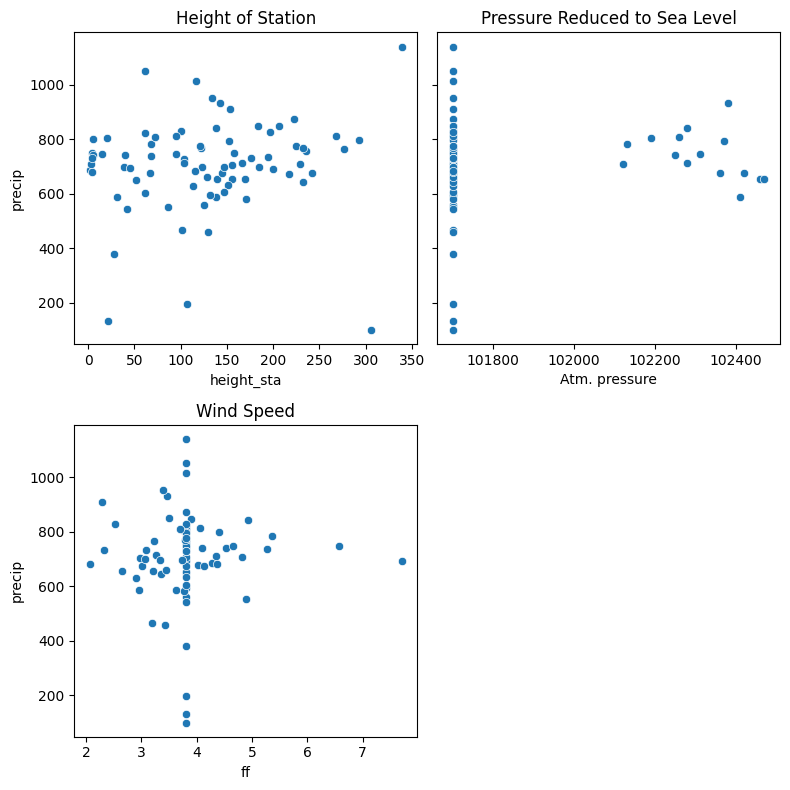

In [20]:
titles = ["Height of Station", "Pressure Reduced to Sea Level", "Wind Speed"]

fig, axs = plt.subplots(2, 2, sharey=True, figsize=[8, 8])
for ax, i, title in zip(axs.flatten(), features, titles):
    sns.scatterplot(data=df, x=i, y='precip', ax=ax)
    ax.set_title(title)  
plt.delaxes(axs[1, 1])
plt.tight_layout()
plt.show()

In [21]:
def color_strong_corr(val):
    color = 'red' if (abs(val) > 0.1) & (abs(val) <1.0) else 'black'
    return 'color: %s' % color
df[['precip','height_sta','Atm. pressure','ff']].corr().\
    style.applymap(color_strong_corr)

,precip,height_sta,Atm. pressure,ff
precip,1.000000,0.132454,0.090590,0.017994
height_sta,0.132454,1.000000,-0.128939,-0.227999
Atm. pressure,0.090590,-0.128939,1.000000,0.076496
ff,0.017994,-0.227999,0.076496,1.000000


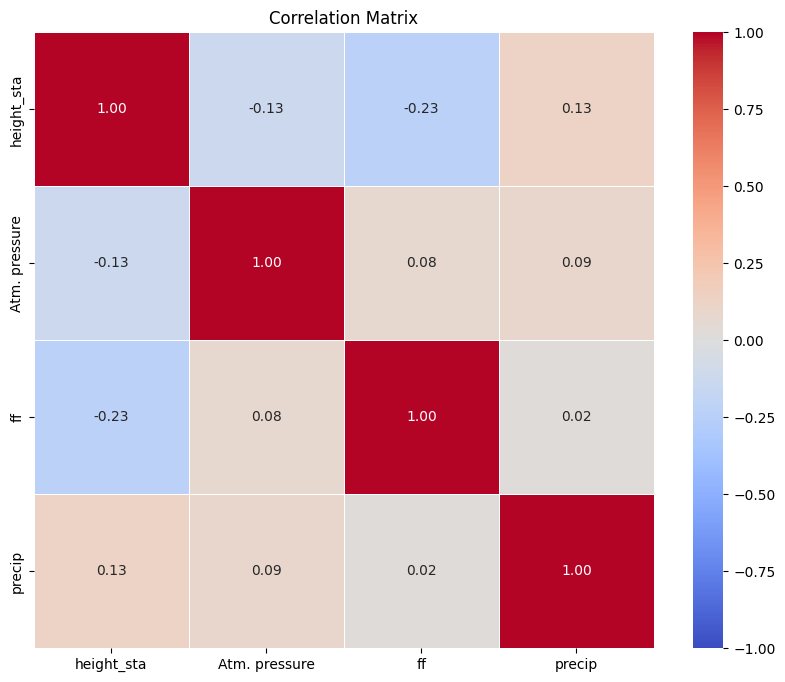

In [22]:
features = ['height_sta', 'Atm. pressure', 'ff', 'precip']
df_features = df[features]
corr_matrix = df_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [23]:
df = weather_data.set_index('date')
df['t'] = df['t'] - 273.5

In [24]:
df

,number_sta,lat,lon,height_sta,dd,ff,precip,hu,td,t,psl
date,,,,,,,,,,,
2016-01-01 00:00:00,14066001,49.330,-0.430,2.0,210.000000,4.400000,0.0,91.000000,278.450012,6.350006,101700.75
2016-01-01 00:00:00,14126001,49.150,0.040,125.0,189.464203,3.816444,0.0,99.000000,278.350006,4.950012,101700.75
2016-01-01 00:00:00,14137001,49.180,-0.460,67.0,220.000000,0.600000,0.0,92.000000,276.450012,4.149994,102360.00
2016-01-01 00:00:00,14216001,48.930,-0.150,155.0,220.000000,1.900000,0.0,95.000000,278.250000,5.450012,101700.75
2016-01-01 00:00:00,14296001,48.800,-1.030,339.0,189.464203,3.816444,0.0,80.991821,280.882141,4.850006,101700.75
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:54:00,80001001,50.136,1.834,72.0,270.000000,2.200000,0.0,87.000000,279.250000,7.750000,103510.00
2018-12-31 23:54:00,80182003,50.187,1.521,4.0,300.000000,4.300000,0.0,82.000000,279.350006,8.750000,101700.75
2018-12-31 23:54:00,80606002,49.957,1.770,121.0,189.464203,3.816444,0.0,80.991821,280.882141,7.350006,101700.75


In [25]:
fig = px.line(df['2016-01-01':'2018-12-30'][['t','hu']].resample('D').mean(),
             title = 'Temperature (°C) - Humidity ratio')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [26]:
fig = px.line(df['2016-01-01':'2018-12-30']['precip'].resample('7D').sum(),
             title = 'Overall weekly precipitation')
fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()

In [27]:
jan_2018 = df['2018-01-03':'2018-01-03'].reset_index()
jan_2018['ff'] = jan_2018['ff'] * 3.6
jan_2017 = df['2017-01-03':'2017-01-03'].reset_index()
jan_2016 = df['2016-01-03':'2016-01-03'].reset_index()

<Axes: title={'center': 'Avg Rainfall per station 2018/01/03'}, xlabel='Hour of the day', ylabel='Precipitation in mm'>

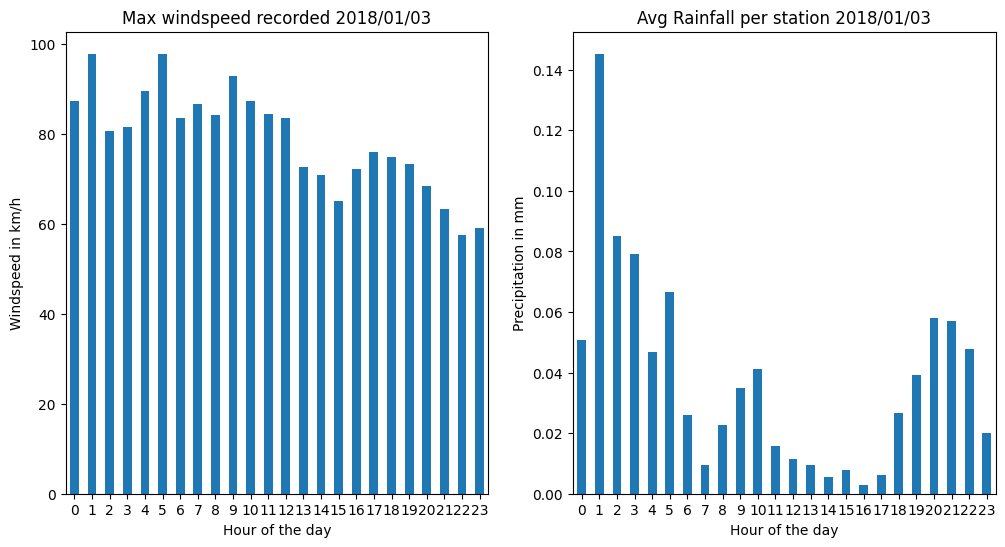

In [28]:
fig,axs = plt.subplots(1,2, figsize = (12,6))
jan_2018.groupby(jan_2018['date'].dt.hour)["ff"].max().plot(kind = 'bar', rot=0,
                                                 title = "Max windspeed recorded 2018/01/03",
                                                 xlabel = 'Hour of the day',
                                                 ylabel = 'Windspeed in km/h',
                                                 ax = axs[0])
jan_2018.groupby(jan_2018['date'].dt.hour)["precip"].mean().plot(kind = 'bar', rot=0,
                                                 title = "Avg Rainfall per station 2018/01/03",
                                                 xlabel = 'Hour of the day',
                                                 ylabel = 'Precipitation in mm',
                                                 ax = axs[1])

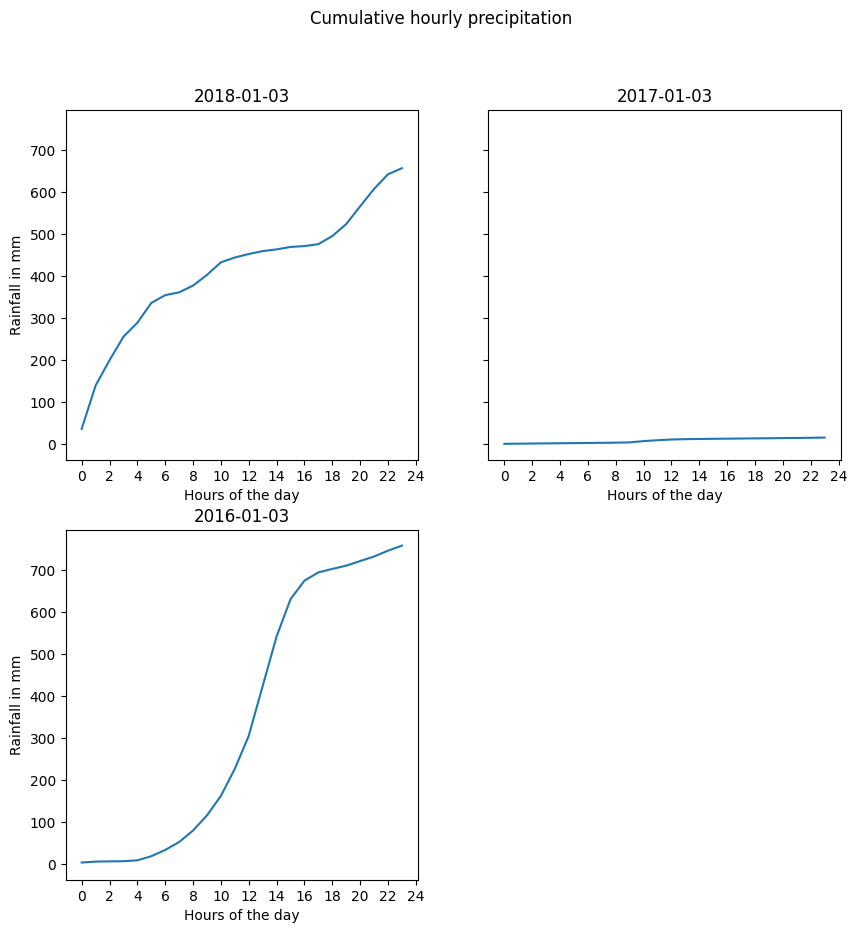

In [29]:
df = [jan_2018,jan_2017,jan_2016]
title = ["2018-01-03","2017-01-03","2016-01-03"]
fig, axs = plt.subplots(2,2, sharey = True, figsize = [10,10])
fig.suptitle("Cumulative hourly precipitation")
for ax,i,df,title in zip(axs.flatten(),features,df,title) :
    df.groupby(df['date'].dt.hour)["precip"].sum().cumsum().plot(kind = 'line',
                             title = title,
                             ylabel = 'Rainfall in mm',
                             xlabel = 'Hours of the day',
                             xticks = np.arange(0,26,2),
                             ax =  ax
                        )
plt.delaxes(axs[1,1])

In [30]:
date_range = pd.date_range(start= '2016-01-01', end = '2018-12-31',
                          freq='D').strftime("%Y-%m-%d")

In [31]:
import time

In [32]:
init = time.time()

In [33]:
def daily_forecast(loc) :
    df = weather_data.loc[weather_data['number_sta'] == loc]
    df = df.set_index('date')
    df['hours'] = [_.hour for _ in df.index]
    df['days'] = [_.dayofyear for _ in df.index]
    df['years'] = [_.year for _ in df.index]
    
   
    df['3'] = df['hours']%3
    df = df.loc[df['3'] == 0.0]
    df = pd.concat([
        df[_:_].drop_duplicates(subset = 'hours').reset_index(drop = True) for
        _ in date_range
                   ]
    )
    df = df[["height_sta","dd","ff","precip","hu","td","t","hours","days","years"]]
    
    return df

In [34]:
features = ["height_sta","dd","ff","precip","hu","td","t","days"]
days0 = np.arange(1,365,2)
days1 = np.arange(2,365,2)
len(days0) == len(days1)


True

In [35]:
def _3h_windowing(df:pd.DataFrame) :
    s_scaler = MinMaxScaler()
    
    days0 = np.arange(1,365,2)
    days1 = np.arange(2,365,2)
    X,y = [],[]
    
    for d0,d1 in zip(days0,days1) :
        x = df.loc[df['days'] == d0]
        z = df.loc[df['days'] == d1]
        
        if len(x) == len(z) :
            X.append(x)
            y.append(z)
            
    X = pd.concat(X)[features]
    y =  pd.concat(y)[features]
    
    X = pd.DataFrame(s_scaler.fit_transform(X))
    y = pd.DataFrame(s_scaler.fit_transform(y))
        
    return X,y, s_scaler

In [36]:
def split_dataset(X:pd.DataFrame, y:pd.DataFrame) :
    
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle = True, random_state=42)
    
    X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, shuffle = True, random_state=7)
    
    return {
        'train_set': tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(64).prefetch(2),
        'val_set' : tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(64).prefetch(2),
        'test_set' : [X_test, y_test]
           }

In [37]:
def model_history(model:'o', train_metrics:str, val_metrics:str, loss:str):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel(loss)
    plt.plot(model.epoch, np.array(model.history[train_metrics]),
           label='Train')
    plt.plot(model.epoch, np.array(model.history[val_metrics]),
           label = 'Val')
    plt.legend()

In [38]:
df = daily_forecast(loc)

In [39]:
df.head(5)

,height_sta,dd,ff,precip,hu,td,t,hours,days,years
0,42.0,189.464203,3.816444,0.0,86.0,277.950012,280.850006,0,1,2016
1,42.0,189.464203,3.816444,0.0,98.0,274.149994,275.250000,3,1,2016
2,42.0,189.464203,3.816444,0.0,99.0,273.950012,274.649994,6,1,2016
3,42.0,189.464203,3.816444,0.0,99.0,277.649994,278.450012,9,1,2016
4,42.0,189.464203,3.816444,0.0,90.0,278.649994,280.950012,12,1,2016


In [40]:
df

,height_sta,dd,ff,precip,hu,td,t,hours,days,years
0,42.0,189.464203,3.816444,0.0,86.0,277.950012,280.850006,0,1,2016
1,42.0,189.464203,3.816444,0.0,98.0,274.149994,275.250000,3,1,2016
2,42.0,189.464203,3.816444,0.0,99.0,273.950012,274.649994,6,1,2016
3,42.0,189.464203,3.816444,0.0,99.0,277.649994,278.450012,9,1,2016
4,42.0,189.464203,3.816444,0.0,90.0,278.649994,280.950012,12,1,2016
...,...,...,...,...,...,...,...,...,...,...
3,42.0,189.464203,3.816444,0.0,100.0,270.649994,271.250000,9,360,2018
4,42.0,189.464203,3.816444,0.0,89.0,273.950012,276.549988,12,360,2018
5,42.0,189.464203,3.816444,0.0,75.0,274.149994,279.350006,15,360,2018
6,42.0,189.464203,3.816444,0.0,89.0,271.649994,273.850006,18,360,2018


**> Pyspark******

In [41]:
!pip install pyspark

In [42]:
df

,height_sta,dd,ff,precip,hu,td,t,hours,days,years
0,42.0,189.464203,3.816444,0.0,86.0,277.950012,280.850006,0,1,2016
1,42.0,189.464203,3.816444,0.0,98.0,274.149994,275.250000,3,1,2016
2,42.0,189.464203,3.816444,0.0,99.0,273.950012,274.649994,6,1,2016
3,42.0,189.464203,3.816444,0.0,99.0,277.649994,278.450012,9,1,2016
4,42.0,189.464203,3.816444,0.0,90.0,278.649994,280.950012,12,1,2016
...,...,...,...,...,...,...,...,...,...,...
3,42.0,189.464203,3.816444,0.0,100.0,270.649994,271.250000,9,360,2018
4,42.0,189.464203,3.816444,0.0,89.0,273.950012,276.549988,12,360,2018
5,42.0,189.464203,3.816444,0.0,75.0,274.149994,279.350006,15,360,2018
6,42.0,189.464203,3.816444,0.0,89.0,271.649994,273.850006,18,360,2018


In [43]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
spark = SparkSession.builder.appName("WeatherForecasting").getOrCreate()
spark_df = spark.createDataFrame(df)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/08/05 23:57:09 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [44]:
spark_df

DataFrame[height_sta: double, dd: double, ff: double, precip: double, hu: double, td: double, t: double, hours: bigint, days: bigint, years: bigint]

In [45]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml import Pipeline


feature_cols = ["height_sta", "dd", "ff", "precip", "hu", "td", "hours", "days", "years"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
pipeline = Pipeline(stages=[assembler])
df_transformed = pipeline.fit(spark_df).transform(spark_df)
df_transformed.select("features").show(truncate=False)



+--------------------------------------------------------------------------------------------------------+
|features                                                                                                |
+--------------------------------------------------------------------------------------------------------+
|[42.0,189.46420288085938,3.8164443969726562,0.0,86.0,277.95001220703125,0.0,1.0,2016.0]                 |
|[42.0,189.46420288085938,3.8164443969726562,0.0,98.0,274.1499938964844,3.0,1.0,2016.0]                  |
|[42.0,189.46420288085938,3.8164443969726562,0.0,99.0,273.95001220703125,6.0,1.0,2016.0]                 |
|[42.0,189.46420288085938,3.8164443969726562,0.0,99.0,277.6499938964844,9.0,1.0,2016.0]                  |
|[42.0,189.46420288085938,3.8164443969726562,0.0,90.0,278.6499938964844,12.0,1.0,2016.0]                 |
|[42.0,189.46420288085938,3.8164443969726562,0.0,87.0,278.6499938964844,15.0,1.0,2016.0]                 |
|[42.0,189.46420288085938,3.816444396

In [46]:
df_transformed

DataFrame[height_sta: double, dd: double, ff: double, precip: double, hu: double, td: double, t: double, hours: bigint, days: bigint, years: bigint, features: vector]

In [47]:
df_transformed.select("features").show()

+--------------------+
|            features|
+--------------------+
|[42.0,189.4642028...|
|[42.0,189.4642028...|
|[42.0,189.4642028...|
|[42.0,189.4642028...|
|[42.0,189.4642028...|
|[42.0,189.4642028...|
|[42.0,189.4642028...|
|[42.0,189.4642028...|
|[42.0,189.4642028...|
|[42.0,189.4642028...|
|[42.0,189.4642028...|
|[42.0,189.4642028...|
|[42.0,189.4642028...|
|[42.0,189.4642028...|
|[42.0,189.4642028...|
|[42.0,189.4642028...|
|[42.0,189.4642028...|
|[42.0,189.4642028...|
|[42.0,189.4642028...|
|[42.0,189.4642028...|
+--------------------+
only showing top 20 rows



In [48]:
train_set,test_set = df_transformed.randomSplit([0.8, 0.2], seed=1234)


In [49]:
train_set

DataFrame[height_sta: double, dd: double, ff: double, precip: double, hu: double, td: double, t: double, hours: bigint, days: bigint, years: bigint, features: vector]

In [50]:
test_set

DataFrame[height_sta: double, dd: double, ff: double, precip: double, hu: double, td: double, t: double, hours: bigint, days: bigint, years: bigint, features: vector]

In [51]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol="features", labelCol="t")
lr_model = lr.fit(train_set)



25/08/05 23:57:22 WARN Instrumentation: [1a680567] regParam is zero, which might cause numerical instability and overfitting.
25/08/05 23:57:24 WARN Instrumentation: [1a680567] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
25/08/05 23:57:26 ERROR LBFGS: Failure! Resetting history: breeze.optimize.FirstOrderException: Line search zoom failed


In [52]:
print(f"Number of iterations: {lr_model.summary.totalIterations}")


Number of iterations: 10


In [53]:
test_predictions = lr_model.transform(test_set)



In [54]:
test_predictions

DataFrame[height_sta: double, dd: double, ff: double, precip: double, hu: double, td: double, t: double, hours: bigint, days: bigint, years: bigint, features: vector, prediction: double]

In [55]:
test_predictions.select("prediction", "t", "features").show()


+------------------+------------------+--------------------+
|        prediction|                 t|            features|
+------------------+------------------+--------------------+
| 299.2774956380001|305.45001220703125|[42.0,189.4642028...|
|304.14203577147805|            310.75|[42.0,189.4642028...|
| 294.3499282241103| 296.3500061035156|[42.0,189.4642028...|
|298.06917858360725| 301.3500061035156|[42.0,189.4642028...|
|298.70987139752424|303.45001220703125|[42.0,189.4642028...|
| 299.4857485803145| 303.1499938964844|[42.0,189.4642028...|
| 299.5784193187101| 303.6499938964844|[42.0,189.4642028...|
| 289.7083874612174|290.54998779296875|[42.0,189.4642028...|
|295.19050996248507|297.45001220703125|[42.0,189.4642028...|
|295.86241604217275|298.04998779296875|[42.0,189.4642028...|
|299.37011402950884|302.95001220703125|[42.0,189.4642028...|
|302.19927072525957| 305.8500061035156|[42.0,189.4642028...|
|303.96518624317855| 308.8500061035156|[42.0,189.4642028...|
|291.51920247905514|    

In [56]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol="t", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(test_predictions)
print(f"test_predictions RMSE: {rmse}")
test_predictions = lr_model.transform(test_set)
test_rmse = evaluator.evaluate(test_predictions)
print(f"Test RMSE: {test_rmse}")


test_predictions RMSE: 1.6722695605149407
Test RMSE: 1.6722695605149407


In [57]:
test_predictions

DataFrame[height_sta: double, dd: double, ff: double, precip: double, hu: double, td: double, t: double, hours: bigint, days: bigint, years: bigint, features: vector, prediction: double]

In [58]:
test_predictions.toPandas()

,height_sta,dd,ff,precip,hu,td,t,hours,days,years,features,prediction
0,42.0,189.464203,3.816444,0.0,25.000000,281.750000,305.450012,15,230,2016,"[42.0, 189.46420288085938, 3.8164443969726562,...",299.277496
1,42.0,189.464203,3.816444,0.0,25.000000,286.950012,310.750000,15,238,2016,"[42.0, 189.46420288085938, 3.8164443969726562,...",304.142036
2,42.0,189.464203,3.816444,0.0,32.000000,277.950012,296.350006,12,127,2016,"[42.0, 189.46420288085938, 3.8164443969726562,...",294.349928
3,42.0,189.464203,3.816444,0.0,32.000000,282.350006,301.350006,15,253,2016,"[42.0, 189.46420288085938, 3.8164443969726562,...",298.069179
4,42.0,189.464203,3.816444,0.0,32.000000,282.850006,303.450012,18,189,2016,"[42.0, 189.46420288085938, 3.8164443969726562,...",298.709871
...,...,...,...,...,...,...,...,...,...,...,...,...
1576,42.0,189.464203,3.816444,0.2,92.000000,281.850006,283.649994,18,119,2018,"[42.0, 189.46420288085938, 3.8164443969726562,...",284.367338
1577,42.0,189.464203,3.816444,0.2,95.000000,281.850006,283.250000,6,338,2018,"[42.0, 189.46420288085938, 3.8164443969726562,...",283.070550
1578,42.0,189.464203,3.816444,0.2,95.000000,282.450012,284.149994,9,338,2018,"[42.0, 189.46420288085938, 3.8164443969726562,...",283.607071
1579,42.0,189.464203,3.816444,0.2,97.000000,285.149994,286.149994,0,358,2018,"[42.0, 189.46420288085938, 3.8164443969726562,...",285.680629


In [59]:
test_predictions

DataFrame[height_sta: double, dd: double, ff: double, precip: double, hu: double, td: double, t: double, hours: bigint, days: bigint, years: bigint, features: vector, prediction: double]

In [60]:
def plot(test_predictions_pd,titel="Test Set: Actual vs Predicted Linear Regression"): 
    plt.figure(figsize=(12, 6))
    plt.plot(test_predictions_pd["t"], label="Actual")
    plt.plot(test_predictions_pd["prediction"], label="Predicted")
    plt.plot(test_predictions_pd["t"] - test_predictions_pd["prediction"], 
             label="Residual (Actual - Predicted)", linestyle="--")
    plt.title(titel)
    plt.xlabel("Index")
    plt.ylabel("Temperature")
    plt.legend()
    plt.show()

In [61]:
from pyspark.ml.regression import DecisionTreeRegressor, RandomForestRegressor


dt = DecisionTreeRegressor(featuresCol="features", labelCol="t")


dt_model = dt.fit(train_set)


rf = RandomForestRegressor(featuresCol="features", labelCol="t")


rf_model = rf.fit(train_set)


dt_predictions = dt_model.transform(test_set)
rf_predictions = rf_model.transform(test_set)


from pyspark.ml.evaluation import RegressionEvaluator


evaluator = RegressionEvaluator(labelCol="t", predictionCol="prediction", metricName="rmse")




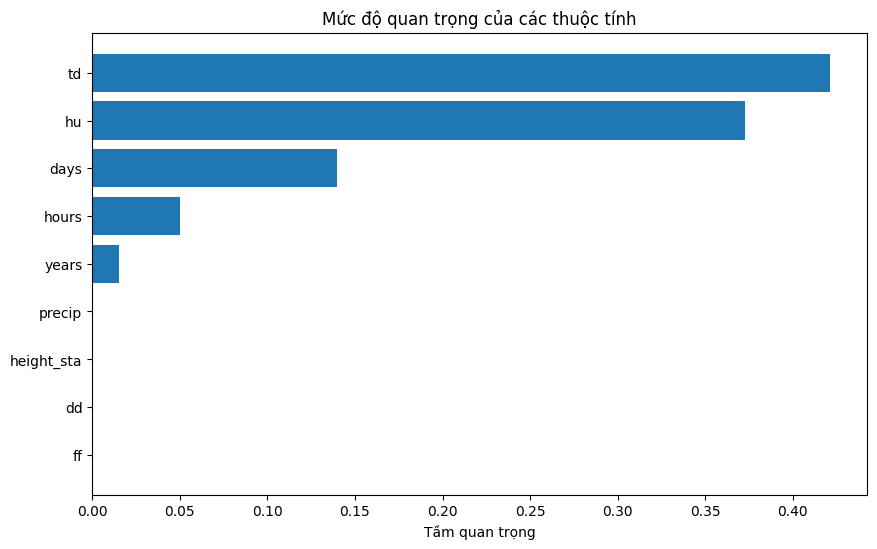

In [62]:
rf_feature_importances = pd.DataFrame({
'feature': feature_cols,
'importance': rf_model.featureImportances.toArray()
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importances['feature'], rf_feature_importances['importance'])
plt.title('Mức độ quan trọng của các thuộc tính')
plt.xlabel('Tầm quan trọng')
plt.gca().invert_yaxis()
plt.show()

In [63]:
dt_predictions.select("t", "prediction").show()

+------------------+------------------+
|                 t|        prediction|
+------------------+------------------+
|305.45001220703125|302.71483637212395|
|            310.75|307.06892023859797|
| 296.3500061035156| 297.7739131761634|
| 301.3500061035156|302.71483637212395|
|303.45001220703125|302.71483637212395|
| 303.1499938964844|302.71483637212395|
| 303.6499938964844|302.71483637212395|
|290.54998779296875| 288.6567786265228|
|297.45001220703125| 297.7739131761634|
|298.04998779296875| 297.7739131761634|
|302.95001220703125|302.71483637212395|
| 305.8500061035156|307.06892023859797|
| 308.8500061035156|307.06892023859797|
|            292.25| 288.6567786265228|
|303.45001220703125|302.71483637212395|
| 305.6499938964844|307.06892023859797|
|            299.75|302.71483637212395|
| 300.8500061035156|302.71483637212395|
| 287.3500061035156| 288.6567786265228|
|300.04998779296875|  299.291999206543|
+------------------+------------------+
only showing top 20 rows



In [64]:
dt_rmse = evaluator.evaluate(dt_predictions)
print(f"Decision Tree RMSE: {dt_rmse}")

rf_rmse = evaluator.evaluate(rf_predictions)
print(f"Random Forest RMSE: {rf_rmse}")

Decision Tree RMSE: 1.8908333708701983
Random Forest RMSE: 2.4313668957807164


In [65]:
dt_predictions

DataFrame[height_sta: double, dd: double, ff: double, precip: double, hu: double, td: double, t: double, hours: bigint, days: bigint, years: bigint, features: vector, prediction: double]

In [66]:

dt_predictions_pd = dt_predictions.select("t", "prediction").toPandas()
rf_predictions_pd = rf_predictions.select("t", "prediction").toPandas()

In [67]:
ln_predictions_pd=test_predictions.select("t", "prediction").toPandas()

In [68]:
dt_predictions_pd

,t,prediction
0,305.450012,302.714836
1,310.750000,307.068920
2,296.350006,297.773913
3,301.350006,302.714836
4,303.450012,302.714836
...,...,...
1576,283.649994,283.577912
1577,283.250000,283.577912
1578,284.149994,283.577912
1579,286.149994,285.879508


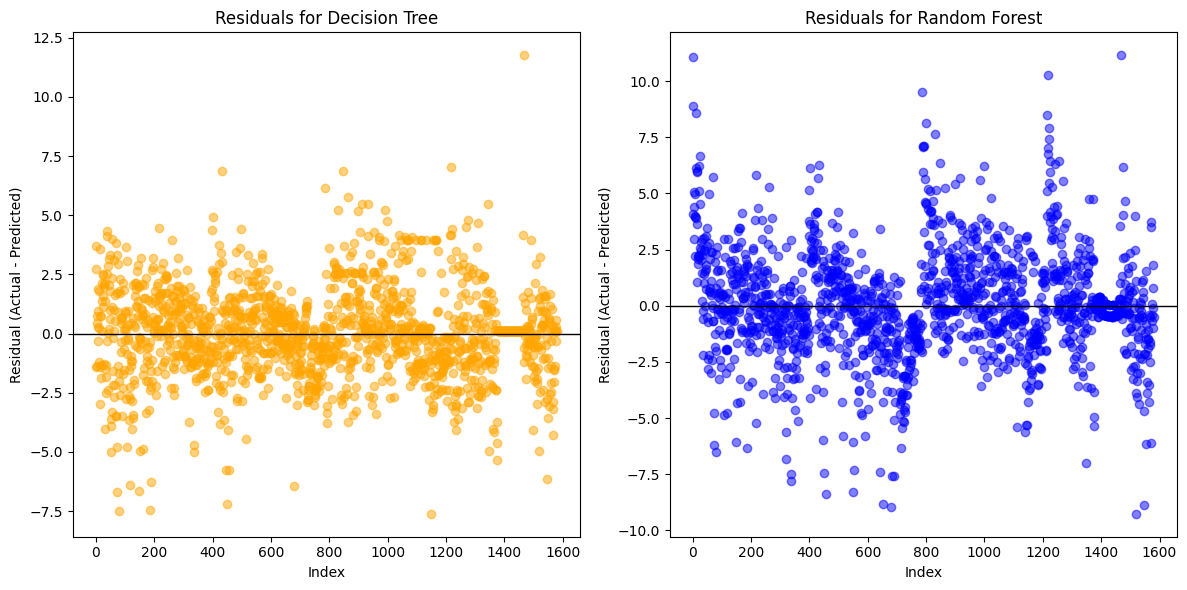

In [69]:

dt_predictions_pd = dt_predictions.select("t", "prediction").toPandas()
rf_predictions_pd = rf_predictions.select("t", "prediction").toPandas()

dt_predictions_pd["residual"] = dt_predictions_pd["t"] - dt_predictions_pd["prediction"]
rf_predictions_pd["residual"] = rf_predictions_pd["t"] - rf_predictions_pd["prediction"]


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.scatter(dt_predictions_pd.index, dt_predictions_pd["residual"], color='orange', alpha=0.5)
plt.axhline(0, color='black', linewidth=1)
plt.title("Residuals for Decision Tree")
plt.xlabel("Index")
plt.ylabel("Residual (Actual - Predicted)")


plt.subplot(1, 2, 2)
plt.scatter(rf_predictions_pd.index, rf_predictions_pd["residual"], color='blue', alpha=0.5)
plt.axhline(0, color='black', linewidth=1)
plt.title("Residuals for Random Forest")
plt.xlabel("Index")
plt.ylabel("Residual (Actual - Predicted)")

plt.tight_layout()
plt.show()

In [70]:
test_predictions_pd= test_predictions.select("t", "prediction").toPandas()
test_predictions_pd["residual"] = test_predictions_pd["t"] - test_predictions_pd["prediction"]

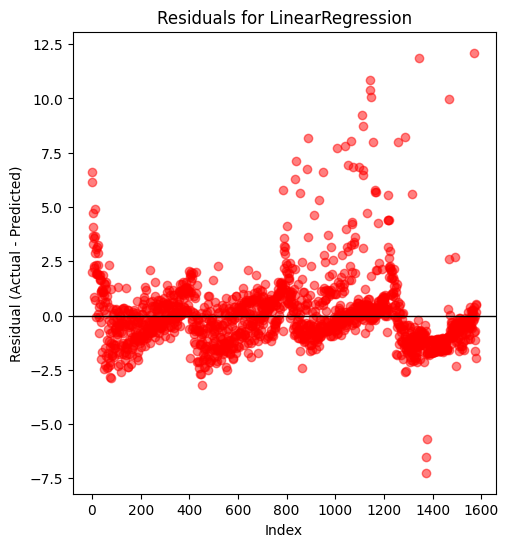

In [71]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(test_predictions_pd.index, test_predictions_pd["residual"], color='red', alpha=0.5)
plt.axhline(0, color='black', linewidth=1)
plt.title("Residuals for LinearRegression")
plt.xlabel("Index")
plt.ylabel("Residual (Actual - Predicted)")
plt.show()

In [72]:
mae_evaluator = RegressionEvaluator(labelCol="t", predictionCol="prediction", metricName="mae")
dt_mae = mae_evaluator.evaluate(dt_predictions)
rf_mae = mae_evaluator.evaluate(rf_predictions)


In [73]:
r2_evaluator = RegressionEvaluator(labelCol="t", predictionCol="prediction", metricName="r2")
dt_r2 = r2_evaluator.evaluate(dt_predictions)
rf_r2 = r2_evaluator.evaluate(rf_predictions)

In [74]:
print("Decision Tree Performance:")
print(f"RMSE: {evaluator.evaluate(dt_predictions)}")
print(f"MAE: {mae_evaluator.evaluate(dt_predictions)}")
print(f"R2: {r2_evaluator.evaluate(dt_predictions)}")

print("\nRandom Forest Performance:")
print(f"RMSE: {evaluator.evaluate(rf_predictions)}")
print(f"MAE: {mae_evaluator.evaluate(rf_predictions)}")
print(f"R2: {r2_evaluator.evaluate(rf_predictions)}")

Decision Tree Performance:
RMSE: 1.8908333708701983
MAE: 1.392393247671895
R2: 0.9416539711072756

Random Forest Performance:
RMSE: 2.4313668957807164
MAE: 1.7638898160863419
R2: 0.9035269998951637


In [75]:
r2_evaluator = RegressionEvaluator(labelCol="t", predictionCol="prediction", metricName="r2")
print("\nLinear Regression Performance:")
print(f"RMSE: {evaluator.evaluate(test_predictions)}")
print(f"MAE: {mae_evaluator.evaluate(test_predictions)}")
print(f"R2: {r2_evaluator.evaluate(test_predictions)}")


Linear Regression Performance:
RMSE: 1.6722695605149407
MAE: 1.0834228122272656
R2: 0.9543629719264366


In [76]:
model_fit.write().overwrite().save("models/Linear_Regression_model")


NameError: name 'model_fit' is not defined